# Simulating the effects of exercise on sleep quality
The overall understanding, is that physical activity (exercise) improves night-sleep quality. For example, this is one study that shows a relationship between physical exercise and sleep quality: [Singh and colleagues, *Sleep* (1997)](https://doi.org/10.1093/sleep/20.2.95). 

#### Overall goal of the simulation
Our goal will be to simulate 10, 25-years old, individuals that have participated in a 1-week sleep wellness plan. The participants will exercise once a day for 2 hour. We will measure how well they felt they sleeped each night following an exercise. More specifically, for each individual, the mean HR across 7 days during the exercise will be correlated with the mean measure of quality of sleep also across the 7 days.

To simulate the effect of physical exercise on the quality of sleep, we will only use indexing and numpy to implement the simulation.

In [133]:
# Before doing anything, let's some import stuff we will need
import numpy as np
import matplotlib.pyplot as plt

### Measure of exercise
First, we will simulate the effect of exercise on heart rate (HR). HR is measured in Beats Per Minute (BPM). HR will be assumed to be stable at a certain BPM during rest periods of the day. HR will be lower during the night, when asleep. Finally, HR will increase from the rest rate during exercise. 

HR during rest and exercise will be different of coruse but also it will differ across individuals. Furthrmore, the intensity of the exercise and the corresponding HR will also be different across individuals.

In [134]:
# Let's define some variables of interest
n = 10 # number of individuals 

# Heart Rate definitions
hr_r = 75 # rest HR averaged across the all individuals
hr_e_p = 2.6 # Max HR during exercise will be 260% resting HR, that is 195
           # This is plausible HR. Inded, generally max HR during exercise is computed as 220-age=195
hr_s_p = .7 # HR during sleep is 70% of the wake rest HR

# Time variables
exercise_duration = 2 # hours
n_days = 7 # number of days of duration of the wellness plan
n_hours = 24 # number of hours in a day

Next, let's compute the distribution of HR across the 10 individuals
to do so we will use the assumptions defined above:
- The rest HR of all subjects comes from the same distribution of HR
- The exercise HR of the subejcts comes from the same distribution of HR
- We will assume a small biologically-plausible standard deviation of HR

In [137]:
# The rest HR 
#
# Rest HR will be computed as follows given the asumptions above
hr_r_sd = hr_r/10 # we arbitrarily set the SD to be 10% of the mean HR

# We will create the distribution of rest HR using randn 
# randn generates random numbers with mean 0 and SD = 1
# To match the needed distribution in our situation
# we add to the numbers generated by `randn` the mean HR 
# and multiple by the SD of the HR
hr_rest_individuals = hr_r + hr_r_sd * np.random.randn(n,1) 

# we now sort the individuals from the lowest resting HR to the highest HR
# this is our simulated distribution of resting HR
hr_rest_individuals = np.sort(hr_rest_individuals, axis=0)  

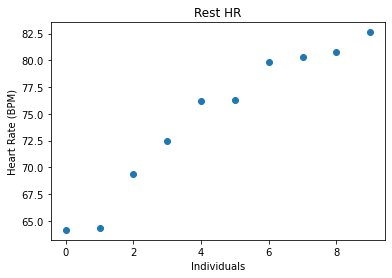

In [138]:
# Let's plot these individuals sorted from the highest to smallest HR
plt.plot(hr_rest_individuals, "o"); # and plot (use the terminal semicolon so you get ONLY the plot)
plt.title('Rest HR');
plt.xlabel('Individuals');
plt.ylabel('Heart Rate (BPM)');

Next, we will simulate the HR for the same 10 individuals during exercise.

In [139]:
# Exercise HR
#
# The exercise HR will be computed as follows given the asumptions above
hr_e_sd = hr_e/10 # we arbitrarily set the SD to be 10% of the mean HR

# We will create the distribution of the exercise HR using randn 
hr_exercise_individuals = hr_e + hr_e_sd * np.random.randn(n,1) 

# we now sort the individuals from the lowest resting HR to the highest HR
# this is our simulated distribution of resting HR
hr_exercise_individuals = np.sort(hr_exercise_individuals, axis=0)  

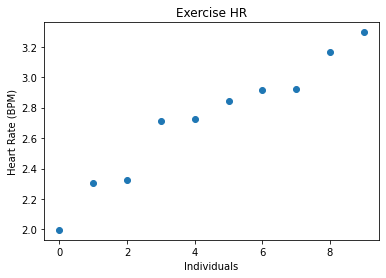

In [140]:
# Let's plot these individuals sorted from the highest to smallest HR
plt.plot(hr_exercise_individuals, "o"); # and plot (use the terminal semicolon so you get ONLY the plot)
plt.title('Exercise HR');
plt.xlabel('Individuals');
plt.ylabel('Heart Rate (BPM)');

Now we have simulated the 10 individuals mean rest and exercise HR. We can plot each individual's HR during rest and exercise. They way we have performed the sorting has made it such that the individuals with higher rest HR also have higher exercise HR. (I am not sure this is correct, but fine for our simulation.)

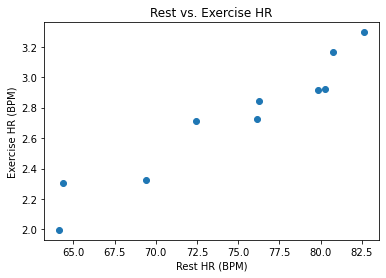

In [141]:
plt.scatter(hr_rest_individuals, hr_exercise_individuals);
plt.title('Rest vs. Exercise HR');
plt.xlabel('Rest HR (BPM)');
plt.ylabel('Exercise HR (BPM)');

### Simulating the 7-days of wellness

Next we will want to simulate the 7-days rest HR.

The HR simulated in the previous section represent the means of the rest and exercise HR foreach individual. These HRs will obviously vary on and not be the same in every hour of each day. That is to say that if my rest HR is generally 75 in som ehours of the day, even if at rest, the rate might be 80 or 70.

In [168]:
# Simulate an array to hold 10 individuals  and 7 x 24 hours
HR_time_series = np.random.randn(n, n_days*n_hours)

# Each individual's rest HR will have the mean shown on the previous figure. 
# Yet, that HR will vary slightly in every hour. 
# So, here we set the mean for every hour first nd add a little bit of variation
HR_h_sd = (hr_rest_individuals/50) # hour-by-hour rest HR variation
HR_time_series = hr_rest_individuals + HR_h_sd * HR_time_series;

Note above that the variables 
 - `hr_rest_individuals` and 
 - `HR_h_sd` 
 
are of shape (10,1).

`HR_time_series` instead is of shape (10,168), yet because the first dimension is 10 in all cases, python does the correct thing and adds or multiplies the arrays correctly for us. This is not a trivial operation. So Kudos to Python.

Next, let's take a look at the variables we just created.

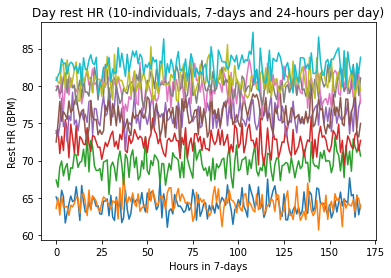

In [169]:
plt.plot(HR_time_series.T);
plt.title('Day rest HR (10-individuals, 7-days and 24-hours per day)');
plt.xlabel('Hours in 7-days');
plt.ylabel('Rest HR (BPM)');

The wellness plan requires 2-hours of exercise every morning and 7 hours of sleep (or at least 7-hours in bed!). 
So, to simulate these two additional variables we will need to add and subtract HR 
to the baseline rest HR array, just created.

We will first add 7 hours of sleep per day, every day. 

Let's think about this. Each day is 24 hours. 24 - 7 = 17. So, every 17 hours we will want to lower the HR to a sleep HR.

In [170]:
# To prepare for adding in the sleep HR will then want to zero-out 
# all the time series in the night.
# Day 1:
d1 = np.arange(17,24)
HR_time_series[:,d1] = np.zeros([n,7])

# Day 2:
d2 = d1 + n_hours
HR_time_series[:,d2] = np.zeros([n,7])

# Day 3:
d3 = d2 + n_hours
HR_time_series[:,d3] = np.zeros([n,7])

# Day 4:
d4 = d3 + n_hours
HR_time_series[:,d4] = np.zeros([n,7])

# Day 5:
d5 = d4 + n_hours
HR_time_series[:,d5] = np.zeros([n,7])

# Day 6:
d6 = d5 + n_hours
HR_time_series[:,d6] = np.zeros([n,7])

# Day 7:
d7 = d6 + n_hours
HR_time_series[:,d7] = np.zeros([n,7])

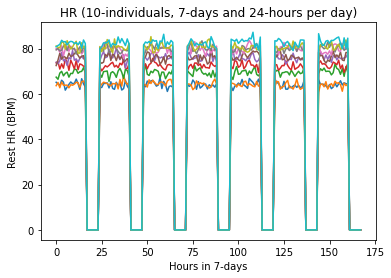

In [171]:
plt.plot(HR_time_series.T);
plt.title('HR (10-individuals, 7-days and 24-hours per day)');
plt.xlabel('Hours in 7-days');
plt.ylabel('Rest HR (BPM)');

#### Creating the exercise HR patters (zeroing out)
Next we will want to add the HR patterns during the exercise. For this we will reuse the previously computer variables and create a new array with HR during each 2-hours windows ofexercise. Individuals will train all together during the wellness program between 6 and 8 am. HR is higher during the exercises. So we will do the following:
 - for each individual, take the rest HR and scale it up and add some noise to it.
 - after that, we will leave the HR patterns for the exercises only active during the exercise hours. That means that the patters will be active only during 2 hours in the morning.

In [173]:
# Also, we will need to zero out the 2-hours windows
# of the exercises. From 

# We will then want to zero-out all the time series not in the night.
# Day 1:
d1 = np.arange(5,7)
HR_time_series[:,d1] = np.zeros([n,2])

# Day 2:
d2 = d1 + n_hours
HR_time_series[:,d2] = np.zeros([n,2])

# Day 3:
d3 = d2 + n_hours
HR_time_series[:,d3] = np.zeros([n,2])

# Day 4:
d4 = d3 + n_hours
HR_time_series[:,d4] = np.zeros([n,2])

# Day 5:
d5 = d4 + n_hours
HR_time_series[:,d5] = np.zeros([n,2])

# Day 6:
d6 = d5 + n_hours
HR_time_series[:,d6] = np.zeros([n,2])

# Day 7:
d7 = d6 + n_hours
HR_time_series[:,d7] = np.zeros([n,2])

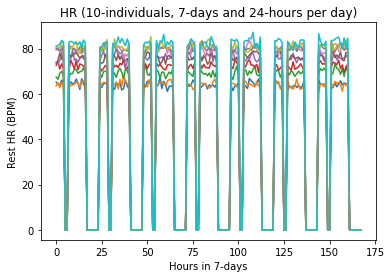

In [174]:
plt.plot(HR_time_series.T);
plt.title('HR (10-individuals, 7-days and 24-hours per day)');
plt.xlabel('Hours in 7-days');
plt.ylabel('Rest HR (BPM)');

#### Creating the sleep HR patters
Next we will want to add the HR patterns dring sleep. For this we will reuse the previously computer variables and create a new array with HR during each night. HR is lower during the nights. So we will do the following:
 - for each individual, take the rest HR and scale it down and add some noise to it.
 - after that, we will leave the HR patterns for the sleep cycles only active during,ahem, the sleep hours. That means that the patters will be active only during the 7 night hours.

In [175]:
# To get started with the sleep HR we will reuse the same 
# method to create the time series as done above
# This time with the mean sleep HR and a small variability around that
HR_sleep_time_series = (hr_rest_individuals * hr_s_p) + \
                       (hr_rest_individuals * hr_s_p)/50 * \
                       np.random.randn(n, n_days*n_hours)

# We will then want to zero-out all the time series not in the night.
# Day 1:
d1 = np.arange(0,17)
HR_sleep_time_series[:,d1] = np.zeros([n,17])

# Day 2:
d2 = d1 + n_hours
HR_sleep_time_series[:,d2] = np.zeros([n,17])

# Day 3:
d3 = d2 + n_hours
HR_sleep_time_series[:,d3] = np.zeros([n,17])

# Day 4:
d4 = d3 + n_hours
HR_sleep_time_series[:,d4] = np.zeros([n,17])

# Day 5:
d5 = d4 + n_hours
HR_sleep_time_series[:,d5] = np.zeros([n,17])

# Day 6:
d6 = d5 + n_hours
HR_sleep_time_series[:,d6] = np.zeros([n,17])

# Day 7:
d7 = d6 + n_hours
HR_sleep_time_series[:,d7] = np.zeros([n,17])

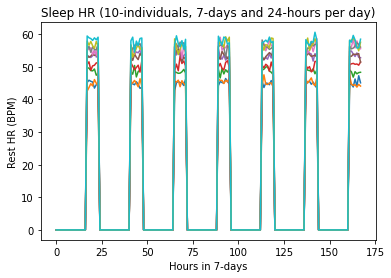

In [154]:
plt.plot(HR_sleep_time_series.T);
plt.title('Sleep HR (10-individuals, 7-days and 24-hours per day)');
plt.xlabel('Hours in 7-days');
plt.ylabel('Rest HR (BPM)');

#### Creating the exercise HR patters
Next we will want to add the HR patterns during the excercise. For this we will reuse the previously computer variables and create a new array with HR during each 2-hours windows ofexercise. Individuals will train all together during the wellness program between 6 and 8 am. HR is higher during the exercises. So we will do the following:
 - for each individual, take the rest HR and scale it up and add some noise to it.
 - after that, we will leave the HR patterns for the exercises only active during the exercise hours. That means that the patters will be active only during 2 hours in the morning.

In [176]:
# To get started with the sleep HR we will reuse the same 
# method to create the time series as done above
# This time with the mean sleep HR and a small variability around that
HR_exercise_time_series = (hr_rest_individuals * hr_e_p) + \
                          (hr_rest_individuals * hr_e_p)/50 * \
                           np.random.randn(n, n_days*n_hours)

# We will then want to zero-out all the time series not in the night.
# Day 1:
d1 = np.arange(0,4)
HR_exercise_time_series[:,d1] = np.zeros([n,4])

dd1 = np.arange(7,24)
HR_exercise_time_series[:,dd1] = np.zeros([n,17])

# Day 2:
d2 = d1 + n_hours
HR_exercise_time_series[:,d2] = np.zeros([n,4])

dd2 = dd1 + n_hours
HR_exercise_time_series[:,dd2] = np.zeros([n,17])

# Day 3:
d3 = d2 + n_hours
HR_exercise_time_series[:,d3] = np.zeros([n,4])

dd3 = dd2 + n_hours
HR_exercise_time_series[:,dd3] = np.zeros([n,17])

# Day 4:
d4 = d3 + n_hours
HR_exercise_time_series[:,d4] = np.zeros([n,4])

dd4 = dd3 + n_hours
HR_exercise_time_series[:,dd4] = np.zeros([n,17])

# Day 5:
d5 = d4 + n_hours
HR_exercise_time_series[:,d5] = np.zeros([n,4])

dd5 = dd4 + n_hours
HR_exercise_time_series[:,dd5] = np.zeros([n,17])

# Day 6:
d6 = d5 + n_hours
HR_exercise_time_series[:,d6] = np.zeros([n,4])

dd6 = dd5 + n_hours
HR_exercise_time_series[:,dd6] = np.zeros([n,17])

# Day 7:
d7 = d6 + n_hours
HR_exercise_time_series[:,d7] = np.zeros([n,4])

dd7 = dd6 + n_hours
HR_exercise_time_series[:,dd7] = np.zeros([n,17])

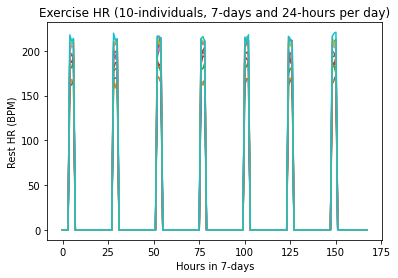

In [164]:
plt.plot(HR_exercise_time_series.T);
plt.title('Exercise HR (10-individuals, 7-days and 24-hours per day)');
plt.xlabel('Hours in 7-days');
plt.ylabel('Rest HR (BPM)');

The final part of our simulation of the sleep patter is to add the sleep time series to the overall day time series.

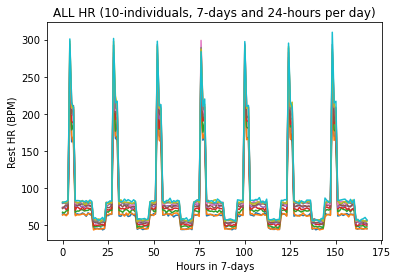

In [177]:
all_HR = HR_exercise_time_series + HR_sleep_time_series + HR_time_series

plt.plot(all_HR.T);
plt.title('ALL HR (10-individuals, 7-days and 24-hours per day)');
plt.xlabel('Hours in 7-days');
plt.ylabel('Rest HR (BPM)');

### Quality of Sleep
We will simulate measures of quality of sleep with the commonly used Pittsburgh Subjective Sleep Quality Index (PSQI: [Buysse et al., *Psychiatry Research* (1989)](https://doi.org/10.1016/0165-1781(89)90047-4)). The PSQI is a composite subjective scale of sleep quality. The scale provides a single total number that summarizes 

HR will be stable during the day but increase during exercise. 